In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

import os
from pathlib import Path

from hypers import weight_hypers
from hypers import alpha_hypers 

from experiment import Params
from experiment import run_experiments
from experiment import load_experiments
from experiment import draw_logs
from experiment import experiments_to_df

from analysis import draw_several
from analysis import extract_needed

In [2]:
experiments_10, df_10 = load_experiments('../results/experim_10.json')
experiments_11, df_11 = load_experiments('../results/experim_11.json')
experiments_12, df_12 = load_experiments('../results/experim_12.json')
experiments_13, df_13 = load_experiments('../results/experim_13.json')

experiments_21, df_21 = load_experiments('../results/experim_21.json')
experiments_22, df_22 = load_experiments('../results/experim_22.json')

experiments_34, df_34 = load_experiments('../results/experim_34.json')

experiments_47, df_47 = load_experiments('../results/experim_47.json')

In [3]:
experiments = experiments_10 + experiments_11 + experiments_12 + experiments_13 + \
experiments_21 + experiments_22 + experiments_34 + experiments_47

In [4]:
df = experiments_to_df(experiments)

In [5]:
table = df[(df["weight_function"] == weight_hypers["simple_101"].repr)]
# print(table[["train_window", "mixing_type", "mean"]].to_latex(float_format="%.2f", index=False))
table

,noise_var,train_window,weight_function,mixing_type,alpha_function,mean,random_0,random_1,random_2,random_3
80,1,5,1 / (x^1.01),decaying past,1 / (x + 1),140895.88,95294.94,122758.45,169223.36,176306.75
89,1,5,1 / (x^1.01),increasing past,1 / (x + 1),155163.20,119500.07,133102.71,192598.94,175451.1
3,1,5,1 / (x^1.01),start,1 / (x + 1),186550.57,150940.0,148558.71,232111.88,214591.69
65,1,5,1 / (x^1.01),uniform past,1 / (x + 1),150308.76,111852.0,130946.05,183911.63,174525.37
84,1,10,1 / (x^1.01),decaying past,1 / (x + 1),123066.72,107134.89,100184.69,148414.86,136532.43
93,1,10,1 / (x^1.01),increasing past,1 / (x + 1),110438.09,96198.94,91478.31,135412.57,118662.53
7,1,10,1 / (x^1.01),start,1 / (x + 1),132268.30,116744.89,102197.55,164543.29,145587.46
69,1,10,1 / (x^1.01),uniform past,1 / (x + 1),110569.83,95947.85,92360.45,134159.57,119811.46
88,1,20,1 / (x^1.01),decaying past,1 / (x + 1),163303.00,140505.53,138038.25,194843.54,179824.67
97,1,20,1 / (x^1.01),increasing past,1 / (x + 1),121289.12,106332.08,103046.84,144829.39,130948.18


In [6]:
import seaborn as sns
sns.set_palette("bright")

def draw_several(from_start=True, logs=None, labels=None, colors=None,
                 best_color="black", best_label="Best partition",
                 title=None, fig_size=(10, 5), loc='upper left', bbox_to_anchor=None, save_path=None):
    if title is None:
        title = "Master total losses for different algorithms"
    shift = 0 if from_start else logs[0].shift

    plt.figure(figsize=fig_size)
    plt.ylim(0, 300000)

    grid = np.arange(logs[0].total_time - shift)

    # plt.plot(grid, logs[0].ideal_losses[shift:].cumsum(), label=best_label, color=best_color)

    for log, label, color in zip(logs, labels, colors):
        plt.plot(grid, log.master_losses_all[shift:].cumsum(), label=label, color=color)

    plt.xlabel("Time")
    
    plt.ylabel("Cumulative loss")

    plt.legend(loc=loc, bbox_to_anchor=bbox_to_anchor)

    bottom, top = plt.gca().get_ybound()
    left, right = plt.gca().get_xbound()
    for gen_idx, gen_stamp in zip(np.r_[logs[0].indexes, -1], logs[0].stamps):
        if gen_stamp < shift:
            continue
        plt.axvline(gen_stamp - shift, color='grey', linestyle=':', lw=1)
        if gen_idx != -1:
            plt.text(x=gen_stamp - shift + 0.005 * (right - left), y=top - 0.06 * (top - bottom),
                              s=f"{gen_idx+1}", color='grey', rotation=15)

    plt.title(title, fontsize=15)
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()


def extract_needed(experiments, needed):
    vital = []
    for experiment in experiments:
        take = True
        for key in needed.keys():
            if getattr(experiment, key) not in needed[key]:
                take = False
        if take:
            vital.append(experiment)
    return vital



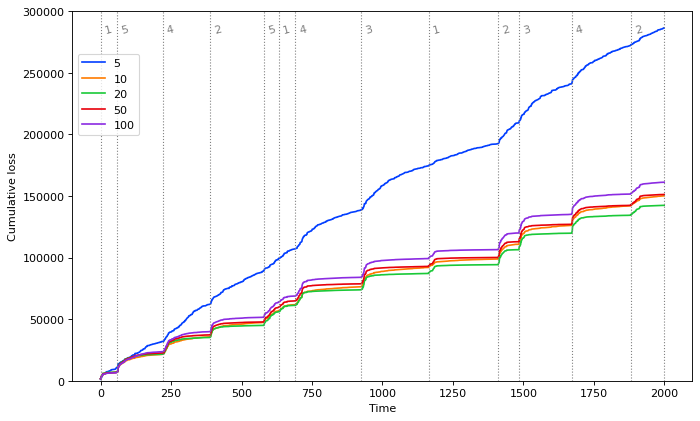

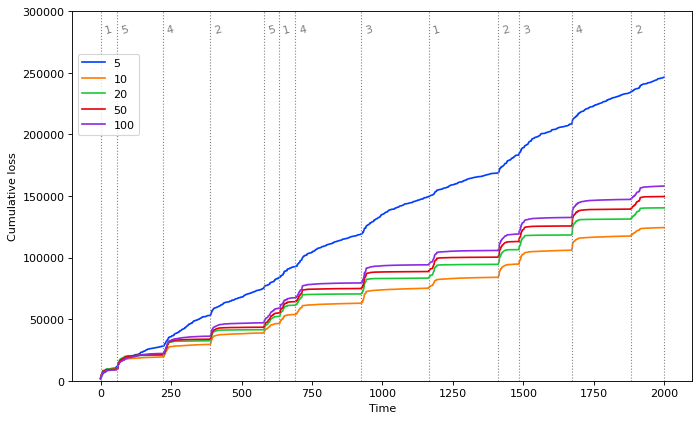

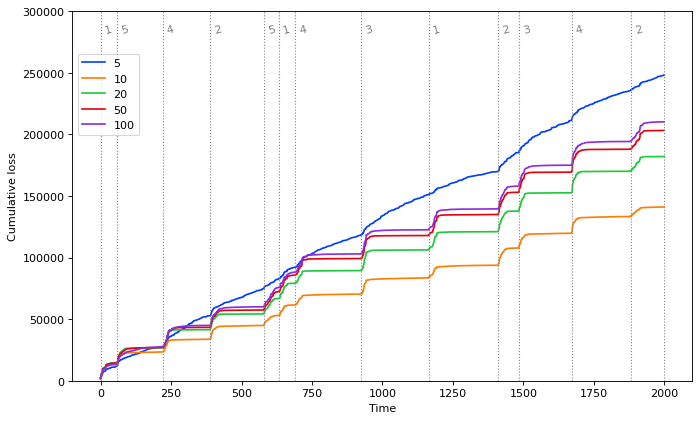

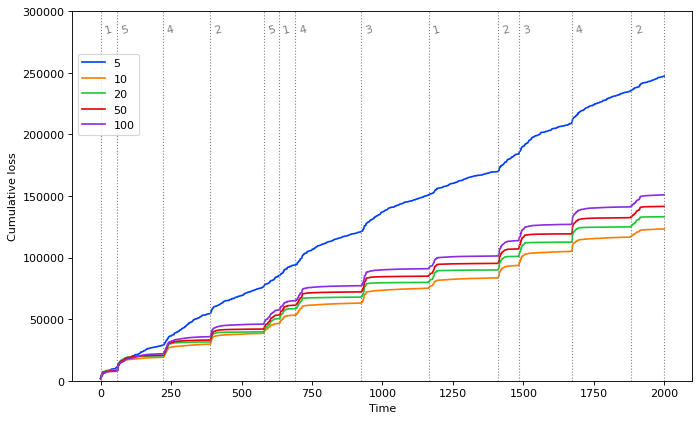

In [7]:
for mt in ["start", "uniform past", "decaying past", "increasing past"]:
    needed_1 = {
        'random_seed': [104],
        'key_a': ["default"],
        'key_w': ["simple_101"],
        'mixing_type': [mt]
    }
    
    interesting = extract_needed(experiments, needed_1)
    
    vital = interesting
    anls = [experiment.logs for experiment in vital]
    labels = [str(experiment.train_window) for experiment in vital]# + " + " + experiment.key_a + " + " + experiment.mixing_type + " + " + experiment.key_w for experiment in vital]
    colors = [None] * len(vital)
    draw_several(from_start=False, logs=anls, labels=labels, colors=colors, 
                 best_color="black", best_label="Best partition",
                 title="", fig_size=(10, 6), loc='upper left', bbox_to_anchor=(0, 0.9))#, save_path=f"pic/diff_tw_{mt[0]}.eps")



In [8]:
table

,noise_var,train_window,weight_function,mixing_type,alpha_function,mean,random_0,random_1,random_2,random_3
80,1,5,1 / (x^1.01),decaying past,1 / (x + 1),140895.88,95294.94,122758.45,169223.36,176306.75
89,1,5,1 / (x^1.01),increasing past,1 / (x + 1),155163.20,119500.07,133102.71,192598.94,175451.1
3,1,5,1 / (x^1.01),start,1 / (x + 1),186550.57,150940.0,148558.71,232111.88,214591.69
65,1,5,1 / (x^1.01),uniform past,1 / (x + 1),150308.76,111852.0,130946.05,183911.63,174525.37
84,1,10,1 / (x^1.01),decaying past,1 / (x + 1),123066.72,107134.89,100184.69,148414.86,136532.43
93,1,10,1 / (x^1.01),increasing past,1 / (x + 1),110438.09,96198.94,91478.31,135412.57,118662.53
7,1,10,1 / (x^1.01),start,1 / (x + 1),132268.30,116744.89,102197.55,164543.29,145587.46
69,1,10,1 / (x^1.01),uniform past,1 / (x + 1),110569.83,95947.85,92360.45,134159.57,119811.46
88,1,20,1 / (x^1.01),decaying past,1 / (x + 1),163303.00,140505.53,138038.25,194843.54,179824.67
97,1,20,1 / (x^1.01),increasing past,1 / (x + 1),121289.12,106332.08,103046.84,144829.39,130948.18


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


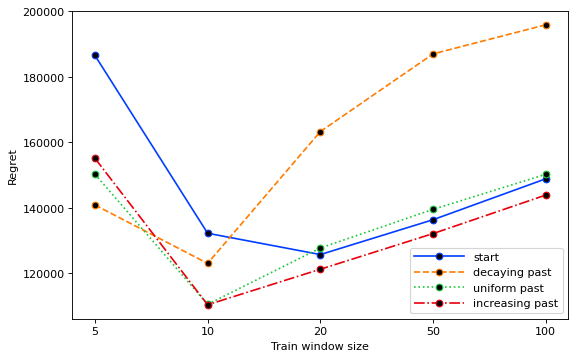

In [58]:
plt.figure(figsize=(8, 5))
linestyles = ["solid", "dashed", "dotted", "dashdot"]
for i , mt in enumerate(["start", "decaying past", "uniform past", "increasing past"]):#table["mixing_type"].unique()):
    vals = table[table["mixing_type"] == mt].sort_values(by="train_window")["mean"].values
    plt.plot(vals, marker='o', mfc='black', linestyle=linestyles[i], label=mt)
plt.xticks(ticks=[0, 1 , 2, 3, 4], labels=[5, 10, 20, 50, 100])
plt.xlabel("Train window size")
plt.ylabel("Regret")
plt.legend(handlelength=4.5)
plt.savefig("../../figures/diff_tw.eps")
plt.show()

array([186550.57, 132268.3 , 125763.68, 136397.74, 148888.73])